## Visualization of Customer Shopping Trends Dataset

### Quick review of collected data 

The dataset was downloaded from Kaggle. Gathered data offer valuable insights into consumer behavior and purchasing patterns.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [3]:
data = pd.read_csv("shopping_trends.csv")

In [4]:
#| label: tbl-overall
#| tbl-cap: "First six observations of analyzed dataset"
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Presented dataset (look @tbl-overall) consists of various informations about shopping trends of US citizens. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included

Number of features:

In [5]:
data.shape[1]

19

Total number of observations:

In [6]:
data.shape[0]

3900

There are no missing values in the data frame. Proof below:

In [7]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### Basic descriptive statistics 

In [8]:
numeric_data = data.select_dtypes(include='number')

In [9]:
stats = numeric_data.describe().iloc[:, 1:].loc[["mean", "std", "min", "50%", "max"]]
stats.Age = stats.Age.round()
stats["Previous Purchases"] = stats["Previous Purchases"].round()

In [10]:
#| label: tbl-statistics
#| tbl-cap: "Descriptive statistics table " 
stats

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
mean,44.0,59.764359,3.749949,25.0
std,15.0,23.685392,0.716223,14.0
min,18.0,20.000000,2.500000,1.0
50%,44.0,60.000000,3.700000,25.0
max,70.0,100.000000,5.000000,50.0


Quick explanation of values of @tbl-statistics: 
<ul>
    <li>mean - calculated mean value of each column</li>
    <li>std - abbreviation for standard deviation</li>
    <li>min - minimal value of each feature</li>
    <li>50% - the second rank quantile, known also as median</li>
    <li>max - maximal value of each column</li>
    
</ul>

###  Visualizations and some interesting conclusions

#### Favourite color of Americans 

In [11]:
data['Color'].value_counts().sort_values(ascending=0)

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Pink         153
Charcoal     153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

The table above shows the most frequently chosen color by Americans. It turns out that the American closet is much more colorful than we could expect. 

#### Who spends more money on shopping?

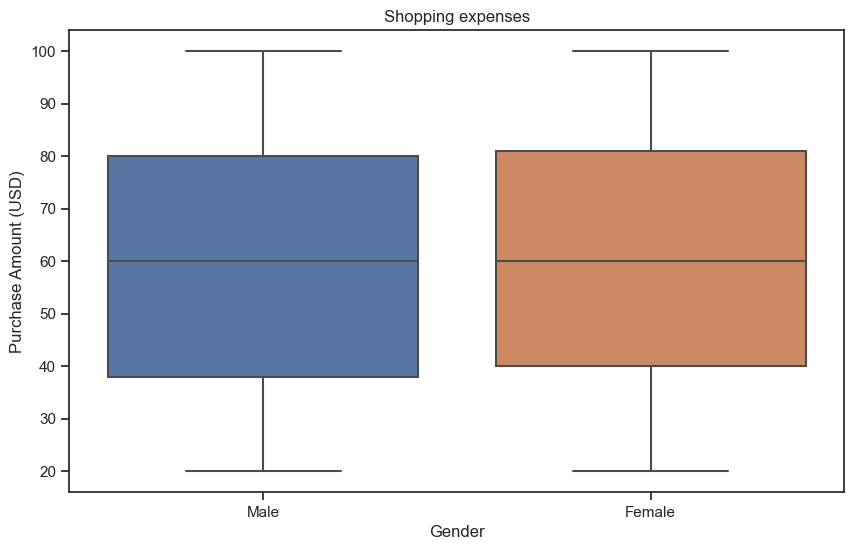

In [12]:
#| label: fig-expenses
#| fig-cap: "Shopping expenses by gender"

plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks")
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=data)
plt.title('Shopping expenses')
plt.show()

In the graph (look @fig-expenses ) above we notice a surprisingly small difference based on the amount spent by gender.
We observe that minimal and maximal values in both groups are the same. The median (or the 0.5 quantile) is basically the same. The only difference (but still relatively small) are the values of 0.25 and 0.75 quantile (bottom and top of the *box*).

In [13]:
data.groupby(["Gender"])["Purchase Amount (USD)"].describe()[["25%", "50%", "75%"]]

,25%,50%,75%
Gender,,,
Female,40.0,60.0,81.0
Male,38.0,60.0,80.0


As we suspected the median is equal in both groups, other quantiles are slightly larger for the `Female` group. 
For example the first quantile (the 0.25 quantile) for Females equals 40, it means that 25% of the total females population has bought something worth at most 40 USD, whereas for the male population it is 38 USD.


Splitting the data to individual product categories we see that the average amount spent by both groups is very similar.

In [14]:
data.groupby(["Gender", "Category"]).mean()["Purchase Amount (USD)"].round(decimals = 2).unstack()

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,60.76,60.5,59.47,58.43
Male,59.41,59.8,60.64,56.61


#### In which state on average people paid the most?

In [15]:
data.groupby(["Location"]).describe()["Purchase Amount (USD)"].sort_values(["mean"], ascending = 0).head(1)["mean"]

Location
Alaska    67.597222
Name: mean, dtype: float64

It turns out that on average the alaska state residents paid the most for their shoppings.
Let's find out what specifically they buy. 

In [16]:
data_alaska = data[data["Location"] == "Alaska"]

In [17]:

palette_color = sns.color_palette('bright') 

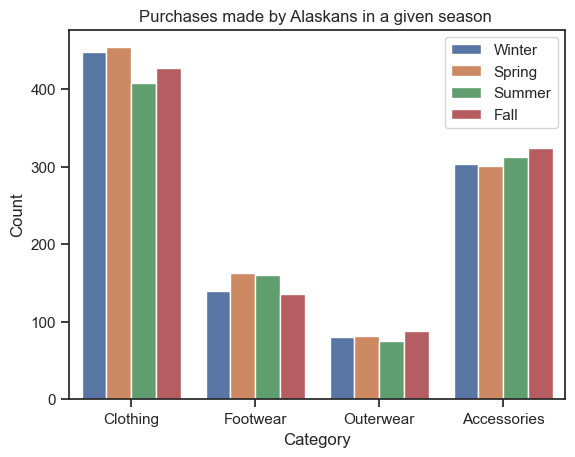

In [18]:
sns.countplot(x = "Category",
           data = data,
           hue = "Season")
plt.title("Purchases made by Alaskans in a given season ")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

Regardless of the season Alaskans mostly buy clothings. It may be surprising that they buy so few outwear despite the climate in which they live. Second most popular category are accessories. Let's look closer into that.

In [19]:
data_alaska_acc =  data_alaska[data_alaska["Category"] == "Accessories"]

In [20]:
keys = data_alaska_acc.groupby(["Item Purchased"]).count().Age
labels = data_alaska_acc.groupby(["Item Purchased"]).count().Age.keys()

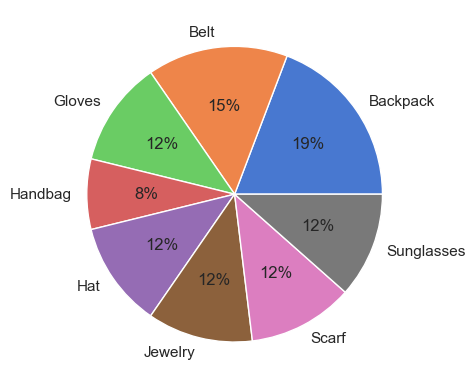

In [21]:
#| label: fig-acc
#| fig-cap: "Favourite accessories of Alaskans"

colors = sns.color_palette('muted')[0:8]
plt.pie(keys, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Thanks to the above pie chart (@fig-acc) we coclude that backpacks are Alaskans beloved accessories

#### Preferred payment methods

In [22]:
bins = [10, 20, 30, 40, 50, 60, 70, 80] 
labels = ['10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70+'] 

data['Age Category'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

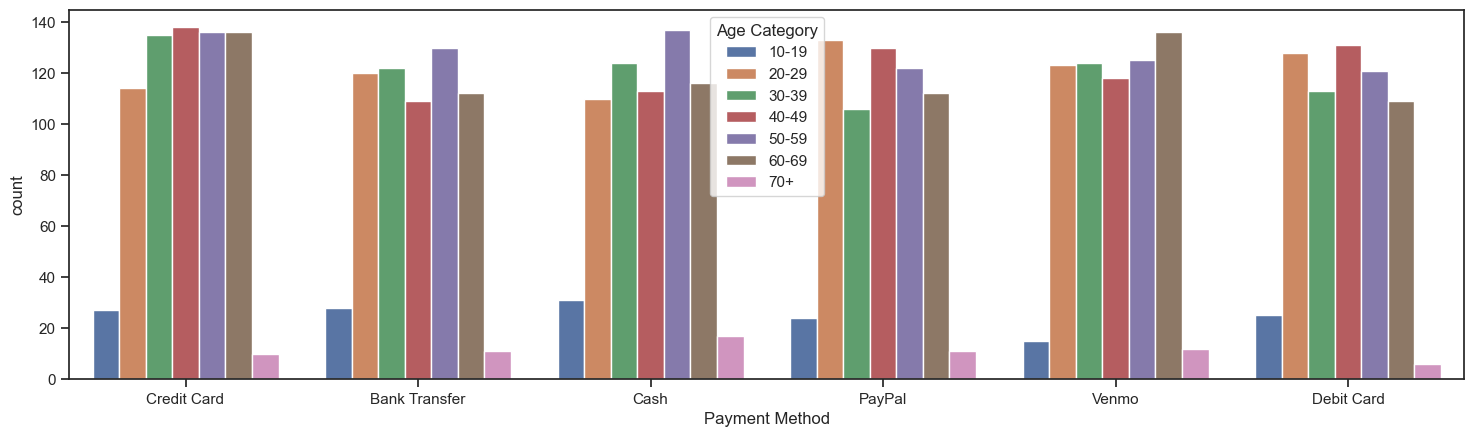

In [23]:
#| label: fig-pay
#| fig-cap: "Americans' preferable payment methods"

plt.figure().set_figwidth(18)
sns.countplot(data = data,
            x = "Payment Method",
             hue = "Age Category")
plt.show()

The bar chart above (@fig-pay) shows that there is not much difference between the different payment methods by age group.
The 60+ generation is just as familiar with online payment methods as the younger generation. Even when it comes to Venmo payments, the 60-69 age group shows the most interest.

#### Out of curiosity 

In [100]:
#Dla pierwszych 10 stanow alfabatycznie i ocen < 3 pokaz co kupowali ludzie 

first10Loc = data.sort_values(['Location']).Location.unique()[: 10]

data[(data.Location.isin(first10Loc)) & (data["Review Rating"] <= 3)].groupby(["Item Purchased"]).count().Age

Item Purchased
Backpack       6
Belt           5
Blouse        12
Boots          4
Coat           5
Dress         10
Gloves         7
Handbag        5
Hat            4
Hoodie        11
Jacket         5
Jeans          5
Jewelry        8
Pants          7
Sandals        8
Scarf          8
Shirt         15
Shoes          6
Shorts         8
Skirt          8
Sneakers       5
Socks          5
Sunglasses    10
Sweater        6
T-shirt        5
Name: Age, dtype: int64

The table above shows the preferences of residents of the first ten states in alphabetical order. For the second condition, the given review of transaction is lower than 3.0.


#### The more orders the better reviews?

As it is shown on the lineplot below there is no correlation between the number of items purchased and given review. 

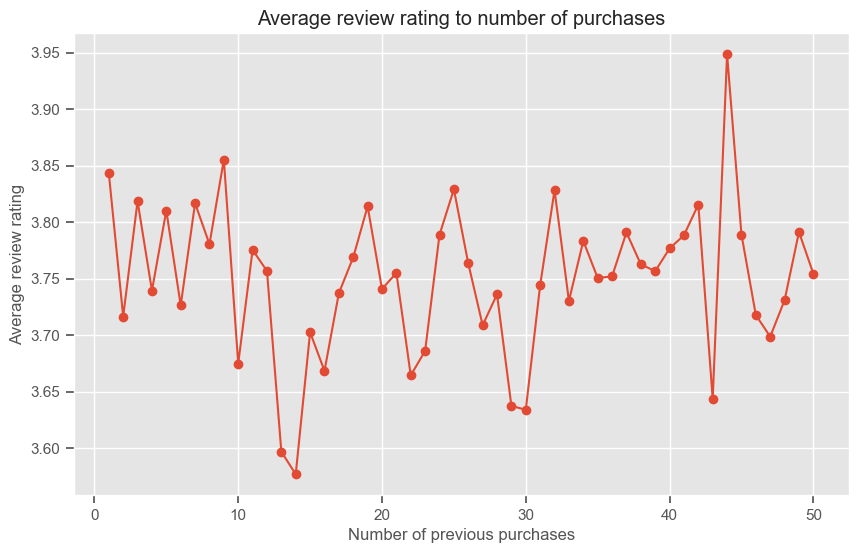

In [146]:

#x = np.linspace(data["Previous Purchases"].min(),data["Previous Purchases"].max())
# y = np.linspace(data["Review Rating"].min(),data["Review Rating"].max())
#data.groupby('Previous Purchases')['Review Rating'].mean()

plt.figure(figsize=(10, 6))
sns.color_palette('muted')
plt.plot(data.groupby('Previous Purchases')['Review Rating'].mean(), marker='o', linestyle='-')

# Dodanie etykiet i tytułu
plt.title('Average review rating to number of purchases')
plt.xlabel('Number of previous purchases')
plt.ylabel('Average review rating')

# Wyświetlenie siatki
plt.grid(1)

# Wyświetlenie wykresu
plt.show()